In [21]:
from ray import tune
import pandas as pd

# INPUT = "/home/richard/repo/forks/meltingpot/results/optuna/coins/experiment_state-2024-02-05_22-24-11.json"
# INPUT = "/scratch/users/k21075402/optuna_single/clean_up_simple_single/experiment_state-2024-04-19_13-38-31.json"
# INPUT = "/scratch/users/k21075402/optuna/single/commons_harvest__open/experiment_state-2024-05-09_16-42-49.json"
# INPUT = "/scratch/users/k21075402/optuna/random/commons_harvest__open/experiment_state-2024-05-10_18-33-19.json"
# INPUT = "/scratch/users/k21075402/run/commons_harvest__open/experiment_state-2024-05-30_17-02-38.json"
INPUT = "/scratch/users/k21075402/optuna/single/commons_harvest__open/experiment_state-2024-05-31_11-55-15.json"
INPUT = "/scratch/users/k21075402/optuna/single/commons_harvest__open/experiment_state-2024-05-31_18-26-59.json"
# INPUT = "/scratch/users/k21075402/optuna/single/commons_harvest__open/experiment_state-2024-06-01_16-49-55.json"


In [24]:
# print([c for c in df.columns if "step" in c])
def format_df(df):
    df = df.rename(columns={'env_runners/episode_reward_mean': 'episode_reward_mean'})
    df['time_total_s'] = df['time_total_s'].astype(int)
    df['episode_reward_mean'] = df['episode_reward_mean'].round()
    cols = ['episode_reward_mean', 'training_iteration', 'timesteps_total', 'time_total_s', 'config/lr', 'config/lambda', 'config/clip_param', 'config/vf_clip_param', 
            'config/vf_loss_coeff', 'config/entropy_coeff', 'config/sgd_minibatch_size', 'config/num_sgd_iter']
    df = df[cols].sort_values(['episode_reward_mean'], ascending=False)
    df = df.dropna()
    return df

In [25]:
import logging
logging.disable(logging.CRITICAL)


df = tune.ExperimentAnalysis(INPUT).results_df
df = format_df(df)

pd.concat([df.head(10), df.tail(5)])

,episode_reward_mean,training_iteration,timesteps_total,time_total_s,config/lr,config/lambda,config/clip_param,config/vf_clip_param,config/vf_loss_coeff,config/entropy_coeff,config/sgd_minibatch_size,config/num_sgd_iter
trial_id,,,,,,,,,,,,
86bacded,779.0,100,3000000,1845,0.000071,0.99,0.30,2,0.80,0.001,10000,12
a25ed6cb,749.0,100,3000000,1842,0.000061,0.99,0.35,2,0.80,0.001,10000,12
9105beb4,747.0,100,3000000,1778,0.000083,0.99,0.30,2,0.85,0.001,10000,10
142bcb3c,740.0,100,3000000,1841,0.000083,0.99,0.30,2,0.80,0.001,10000,12
df9ae9e4,739.0,100,3000000,1777,0.000065,0.99,0.30,2,0.80,0.001,10000,10
c7d09840,730.0,100,3000000,1841,0.000070,0.99,0.35,2,0.80,0.001,10000,12
49574d02,722.0,100,3000000,1841,0.000072,0.99,0.35,2,0.80,0.001,10000,12
cfb71f8b,716.0,100,3000000,1844,0.000092,0.99,0.35,2,0.80,0.001,10000,12
800532f7,715.0,100,3000000,1909,0.000057,0.99,0.35,2,0.85,0.001,7500,12


In [17]:
df['time_total_s']

trial_id
ec9c9364    649.833279
ad1751fa    662.514485
c45275cf    660.568152
25a3703c    685.281022
468eb271    630.994011
               ...    
f642c6ba    310.202055
0782a699    354.250953
b8f074bd    345.571562
e768255d    315.496586
84a6cec6           NaN
Name: time_total_s, Length: 93, dtype: float64

array([[<Axes: title={'center': 'episode_reward_mean'}>]], dtype=object)

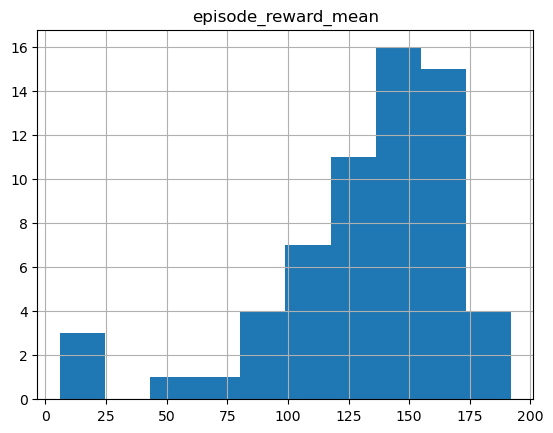

In [5]:
df[df['training_iteration'] == 50].hist('episode_reward_mean')

array([[<Axes: title={'center': 'episode_reward_mean'}>]], dtype=object)

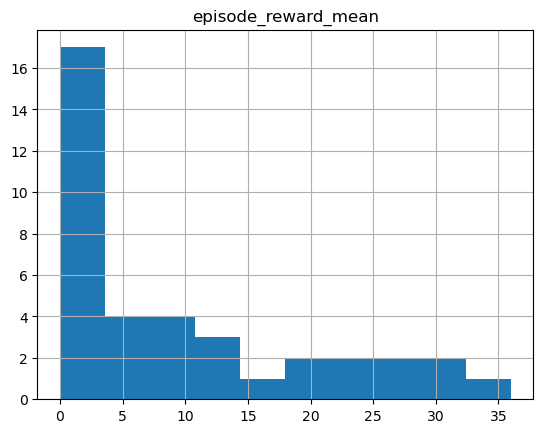

In [6]:
df[df['training_iteration'] == 25].hist('episode_reward_mean')